In [1]:
import sys
sys.path.append('/home/drl/PycharmProjects/underacuatedRoboics/drake/build/install/lib/python2.7/site-packages')

In [2]:
import numpy as np
import time
import pydrake
from pydrake.math import RigidTransform
from pydrake.systems.analysis import Simulator

from robot.RobotDiagram import LaikagoSimulationDiagram
from robot.laikago_config import *
from robot.utils import render_system_with_graphviz


is_graphviz = True
timestep = 0.001
sim_duration = 3.0
real_time_rate = 1

system_diagram = LaikagoSimulationDiagram(timestep)

mbp = system_diagram.get_mbp()
diagram = system_diagram.get_diagram()

# generate system diagram using graphviz if not in test mode
if is_graphviz:
    render_system_with_graphviz(diagram, "robot/view.gv")

diagram_context = diagram.CreateDefaultContext()
mbp_context = diagram.GetMutableSubsystemContext(mbp, diagram_context)

# set initial pose for the robot.
if not system_diagram.is_fixed:
    X_WRobot = RigidTransform.Identity()
    X_WRobot.set_translation(system_diagram.laikago_initial_position_in_world_frame)
    mbp.SetFreeBodyPose(mbp_context, mbp.GetBodyByName("trunk", system_diagram.laikago_model),
                        X_WRobot)

# set initial posture of the robot.
for i, joint_angle in enumerate(ROBOT_STANCE_CONFIGURATION):
    laikago_joint = mbp.GetJointByName(JointName_list[i])
    laikago_joint.set_angle(context=mbp_context, angle=joint_angle)

# simulation
simulator = Simulator(diagram, diagram_context)  #
simulator.set_publish_every_time_step(False)
simulator.set_target_realtime_rate(real_time_rate)
simulator.Initialize()

# need a few seconds to initiate the visualization
if system_diagram.is_meshcat:
    time.sleep(5)
print('Simulation is begining...')


# Run simulation
simulator.StepTo(sim_duration)

Connecting to meshcat-server at zmq_url=tcp://127.0.0.1:6000...
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/
Connected to meshcat-server.


In [5]:
state_log = system_diagram.LoggerList[0]
desired_state = np.array([0, 0  , 0, 0, 0.62, 0.62, 0.62, 0.62, -1.06, -1.06, -1.06, -1.06])
command_log = system_diagram.LoggerList[1]

log_data = state_log.data()
command_data = command_log.data()

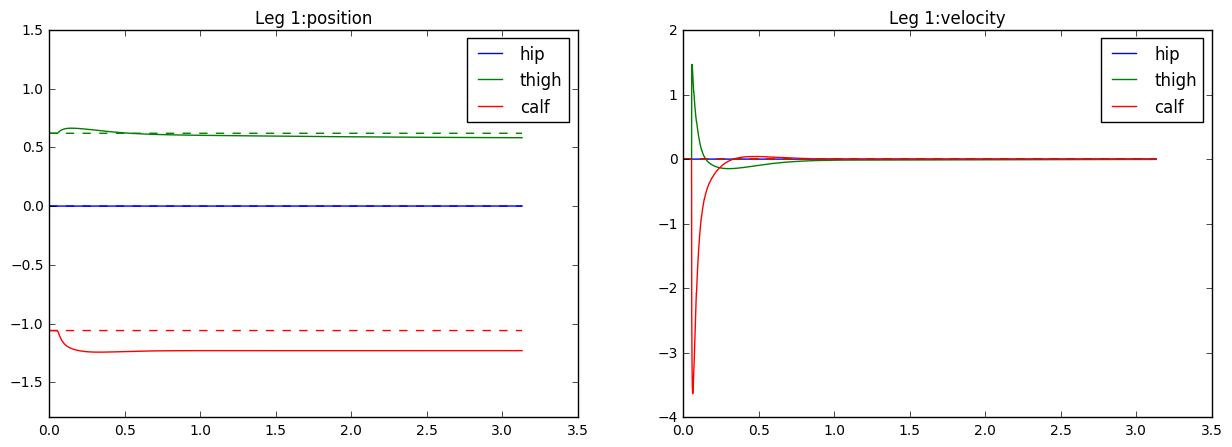

In [13]:
from matplotlib.pylab import plt
t = np.linspace(0, log_data.shape[1]*timestep, num =log_data.shape[1])

leg_no = 1

q_h_d = np.ones(log_data.shape[1]) * desired_state[0 + leg_no - 1]
q_t_d = np.ones(log_data.shape[1]) * desired_state[4 + leg_no - 1]
q_c_d = np.ones(log_data.shape[1]) * desired_state[8 + leg_no - 1]

q_h = log_data[7 + leg_no - 1]
q_t = log_data[11 + leg_no - 1]
q_c = log_data[15 + leg_no - 1]




qv_h_d = np.ones(log_data.shape[1]) * 0
qv_t_d = np.ones(log_data.shape[1]) * 0
qv_c_d = np.ones(log_data.shape[1]) * 0

qv_h = log_data[25 + leg_no - 1]
qv_t = log_data[29 + leg_no - 1]
qv_c = log_data[33 + leg_no - 1]


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(t, q_h, 'b',  label = 'hip')
plt.plot(t, q_t, 'g',  label = 'thigh')
plt.plot(t, q_c, 'r',  label = 'calf')
plt.title('Leg {}:position'.format(leg_no))
plt.legend()

plt.plot(t, q_h_d, '--b',  label = 'hip')
plt.plot(t, q_t_d, '--g',  label = 'thigh')
plt.plot(t, q_c_d, '--r',  label = 'calf')

plt.ylim([-1.8, 1.5])

plt.subplot(122)
 
plt.plot(t, qv_h, 'b',  label = 'hip')
plt.plot(t, qv_t, 'g',  label = 'thigh')
plt.plot(t, qv_c, 'r',  label = 'calf')
plt.legend()

plt.plot(t, qv_h_d, '--b',  label = 'hip')
plt.plot(t, qv_t_d, '--g',  label = 'thigh')
plt.plot(t, qv_c_d, '--r',  label = 'calf')
plt.title('Leg {}:velocity'.format(leg_no))


 


# for i in range(12):
#     plt.figure()
#     plt.plot(t, log_data[i], label = str(i))
#     plt.legend()
#plt.show()

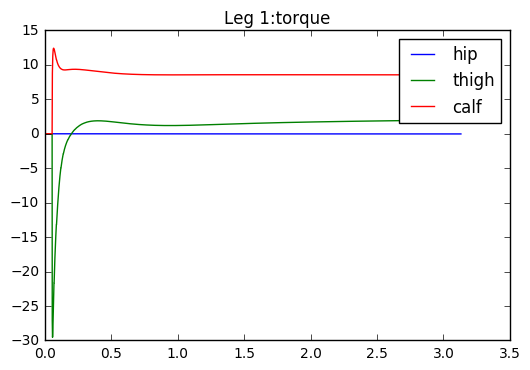

In [14]:
c_h = command_data[3*(leg_no - 1)]
c_t = command_data[3*(leg_no - 1) + 1]
c_c = command_data[3*(leg_no - 1) +2]

# c_h_ff = ff_command_data[3*(leg_no - 1)]
# c_t_ff = ff_command_data[3*(leg_no - 1) + 1]
# c_c_ff = ff_command_data[3*(leg_no - 1) +2]


plt.plot(t, c_h, 'b',  label = 'hip')
plt.plot(t, c_t, 'g',  label = 'thigh')
plt.plot(t, c_c, 'r',  label = 'calf')
plt.legend()
plt.title('Leg {}:torque'.format(leg_no))

# plt.plot(t, c_h_ff, '--b',  label = 'hip')
# plt.plot(t, c_t_ff, '--g',  label = 'thigh')
# plt.plot(t, c_c_ff, '--r',  label = 'calf')

plt.show()

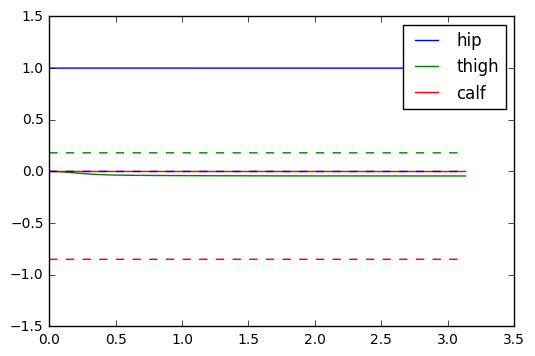

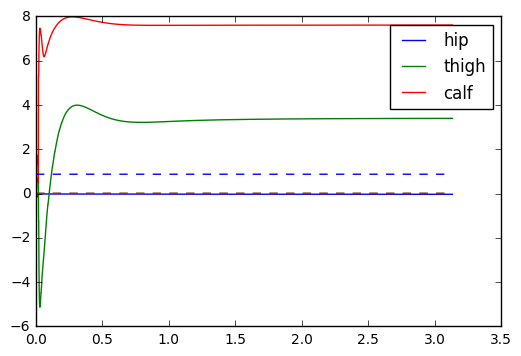

In [8]:
from matplotlib.pylab import plt
t = np.linspace(0, log_data.shape[1]*timestep, num =log_data.shape[1])

leg_no = 1

q_h_d = np.ones(log_data.shape[1]) * init_state[0 + leg_no - 1]
q_t_d = np.ones(log_data.shape[1]) * init_state[4 + leg_no - 1]
q_c_d = np.ones(log_data.shape[1]) * init_state[8 + leg_no - 1]

q_h = log_data[0 + leg_no - 1]
q_t = log_data[4 + leg_no - 1]
q_c = log_data[8 + leg_no - 1]


c_h = command_data[3*(leg_no - 1)]
c_t = command_data[3*(leg_no - 1) + 1]
c_c = command_data[3*(leg_no - 1) +2]

c_h_ff = ff_command_data[3*(leg_no - 1)]
c_t_ff = ff_command_data[3*(leg_no - 1) + 1]
c_c_ff = ff_command_data[3*(leg_no - 1) +2]


plt.figure()
plt.plot(t, q_h, 'b',  label = 'hip')
plt.plot(t, q_t, 'g',  label = 'thigh')
plt.plot(t, q_c, 'r',  label = 'calf')
plt.legend()

plt.plot(t, q_h_d, '--b',  label = 'hip')
plt.plot(t, q_t_d, '--g',  label = 'thigh')
plt.plot(t, q_c_d, '--r',  label = 'calf')

plt.ylim([-1.5, 1.5])

plt.figure()
plt.plot(t, c_h, 'b',  label = 'hip')
plt.plot(t, c_t, 'g',  label = 'thigh')
plt.plot(t, c_c, 'r',  label = 'calf')
plt.legend()

plt.plot(t, c_h_ff, '--b',  label = 'hip')
plt.plot(t, c_t_ff, '--g',  label = 'thigh')
plt.plot(t, c_c_ff, '--r',  label = 'calf')


# for i in range(12):
#     plt.figure()
#     plt.plot(t, log_data[i], label = str(i))
#     plt.legend()
plt.show()

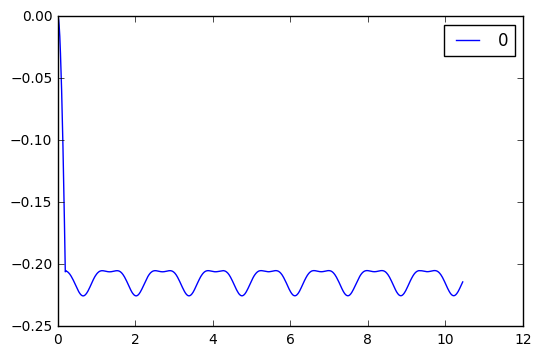

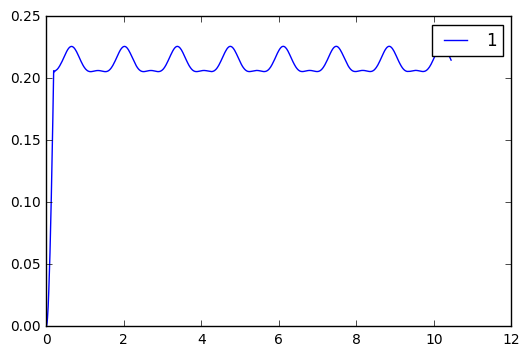

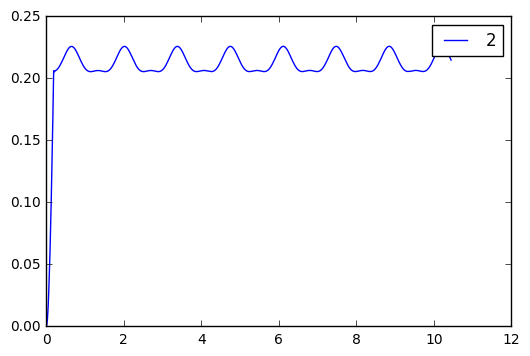

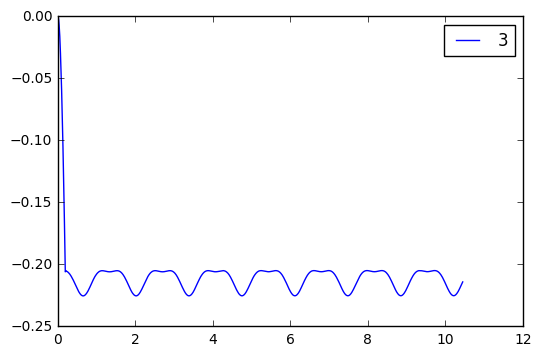

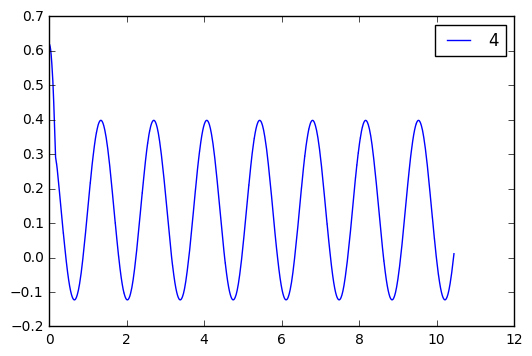

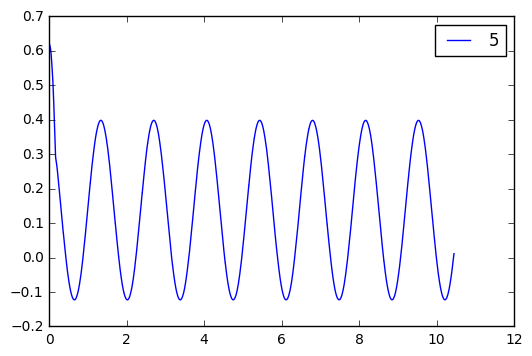

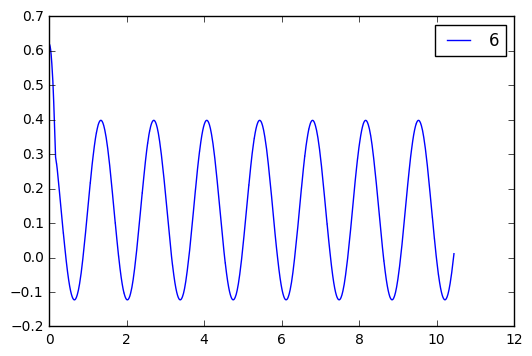

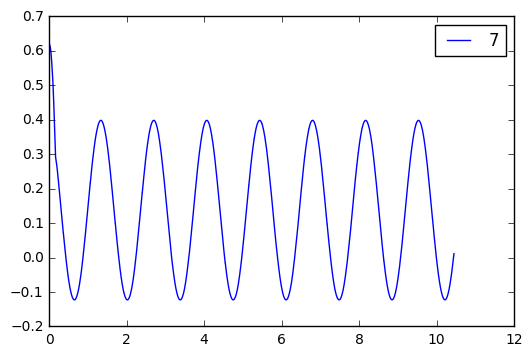

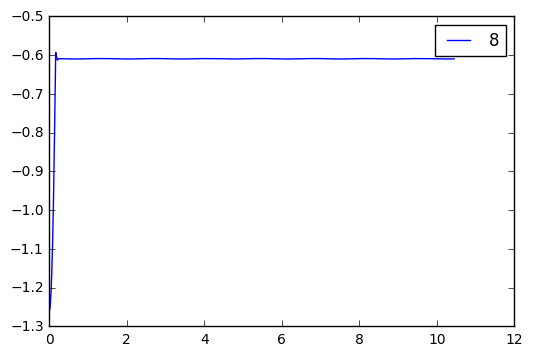

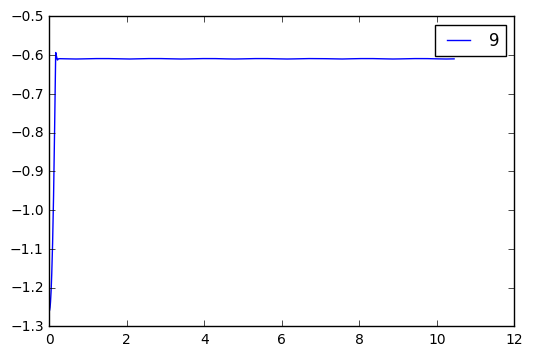

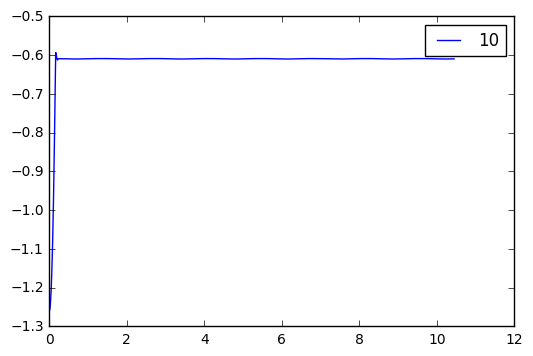

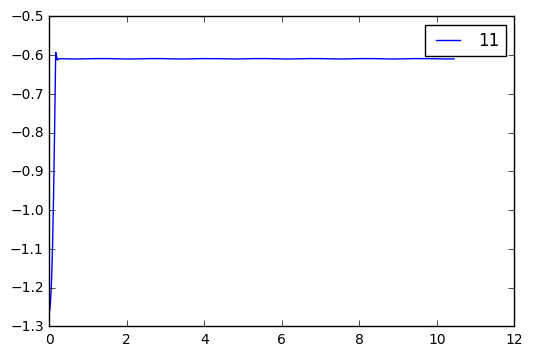

In [13]:
from matplotlib.pylab import plt
t = np.linspace(0, log_data.shape[1]*timestep, num =log_data.shape[1])


for i in range(12):
    plt.figure()
    plt.plot(t, log_data[i], label = str(i))
    plt.legend()
plt.show()

In [679]:
fl_j = mbp.GetJointByName('FL_hip_joint')
fl_j.velocity_start()

6

In [676]:
motor_name = [
"FL_hip_joint", "FR_hip_joint", "RR_hip_joint", "RL_hip_joint",
"FL_thigh_joint", "FR_thigh_joint", "RR_thigh_joint", "RL_thigh_joint",
"FL_calf_joint", "FR_calf_joint", "RR_calf_joint", "RL_calf_joint",
]

actuator_name = [
'FL_hip_motor', 'FL_thigh_motor', 'FL_calf_motor',
'FR_hip_motor', 'FR_thigh_motor', 'FR_calf_motor',
'RR_hip_motor', 'RR_thigh_motor', 'RR_calf_motor',
'RL_hip_motor', 'RL_thigh_motor', 'RL_calf_motor']

In [680]:
for i in range(12):
    print(motor_name[i])
    print(mbp.GetJointByName(motor_name[i]).position_start())
    print(mbp.GetJointByName(motor_name[i]).velocity_start())

FL_hip_joint
7
6
FR_hip_joint
8
7
RR_hip_joint
9
8
RL_hip_joint
10
9
FL_thigh_joint
11
10
FR_thigh_joint
12
11
RR_thigh_joint
13
12
RL_thigh_joint
14
13
FL_calf_joint
15
14
FR_calf_joint
16
15
RR_calf_joint
17
16
RL_calf_joint
18
17


In [687]:
a = np.arange(19)
b = np.ones(18)*1.2

c = np.concatenate((a, b))
print(c)

[  0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
  12.   13.   14.   15.   16.   17.   18.    1.2   1.2   1.2   1.2   1.2
   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2   1.2
   1.2]


In [691]:
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [690]:
c = np.arange(37)
d = c[25:37]
d.shape

(12,)

In [682]:

mbp.num_positions(laikago_model)

19

In [683]:
mbp.num_velocities(laikago_model)

18

In [685]:
mbp.num_multibody_states()

37

In [684]:
mbp.num_model_instances()

5

In [183]:
actuator_choice_matrix.T

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [ ]:
u = np.array()

In [184]:
# original
#actuator_choice_matrix
# array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
#        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
#        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
#        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [5]:
for i in range(12):
    print(i)
    print(rbt.get_position_name(i))

0
FL_hip_joint
1
FL_thigh_joint
2
FL_calf_joint
3
FR_hip_joint
4
FR_thigh_joint
5
FR_calf_joint
6
RR_hip_joint
7
RR_thigh_joint
8
RR_calf_joint
9
RL_hip_joint
10
RL_thigh_joint
11
RL_calf_joint


In [6]:
mbp.get_output_port()

<pydrake.systems.framework.OutputPort_[float] at 0x7f860c03b1f0>

In [14]:
mbp.GetJointActuatorByName('RR_hip_motor')



In [13]:
mbp.GetPositionUpperLimits()

array([        inf,         inf,         inf,         inf,         inf,
               inf,         inf,  1.04719755,  0.87266463,  0.87266463,
        1.04719755,  3.92699082,  3.92699082,  3.92699082,  3.92699082,
       -0.61086524, -0.61086524, -0.61086524, -0.61086524])

In [19]:
mbp.MakeActuationMatrix().shape

(18, 12)

In [18]:
mbp.num_actuated_dofs()

12